In [1]:
# primero instalamos las librerias a utilizar
!pip install matplotlib
!pip install scikit-learn
!pip install pandas
!pip install imbalanced-learn
!pip install jupyterthemes


In [ ]:
# Nuestro conjunto de datos esta dividido en dos partes de entrenamiento y prueba, vamos a descargar el conjunto de entrenamiento 

In [3]:

# descargamos el dataset de 
import pandas as pd
csv_file_path = "/Users/USUARIO/Desktop/pulsar_data_train.csv"
df = pd.read_csv(csv_file_path)
print(df.head())
#df = df.sample(n=5370, random_state=42)
#df.shape





    Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                        

In [4]:
# iniciamos con el analisis exploratorio de los datos
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [6]:
# vemos que existen valores NaN en nuestro conjunto de datos, veamos cuantos hay 
nulos_por_columna = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos_por_columna)
print(df.size)



Valores nulos por columna:
 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64
112752


In [7]:
# como tenemos en total 3538 valores de 83457 eliminaremos todas las filas que contengan valores NaN
# perdiendo el 10% de los datos en el proceso valor insignificante para nuestro modelo
df.dropna(inplace=True)
verificacion_eliminacion_de_valores_nulos=df.isnull().sum()
print(verificacion_eliminacion_de_valores_nulos)


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


0.0    8423
1.0     850
Name: target_class, dtype: int64


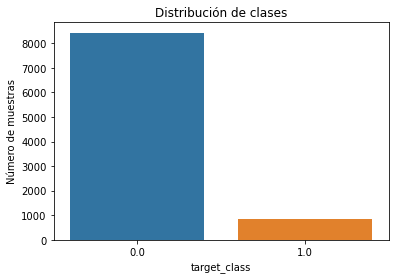

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ver distribución de las clases 
print(df['target_class'].value_counts())

sns.countplot(x='target_class', data=df)
plt.title("Distribución de clases")
plt.xlabel("target_class")
plt.ylabel("Número de muestras")
plt.show()

In [ ]:
 #vemos que las clases estan fuertemente desbalanceadas un 10 % para pulsar y un 90% que no son pulsares, vamos a trabajar esto mas adelante, penalizando la clase d
#dominante

<AxesSubplot:xlabel='target_class', ylabel='Density'>

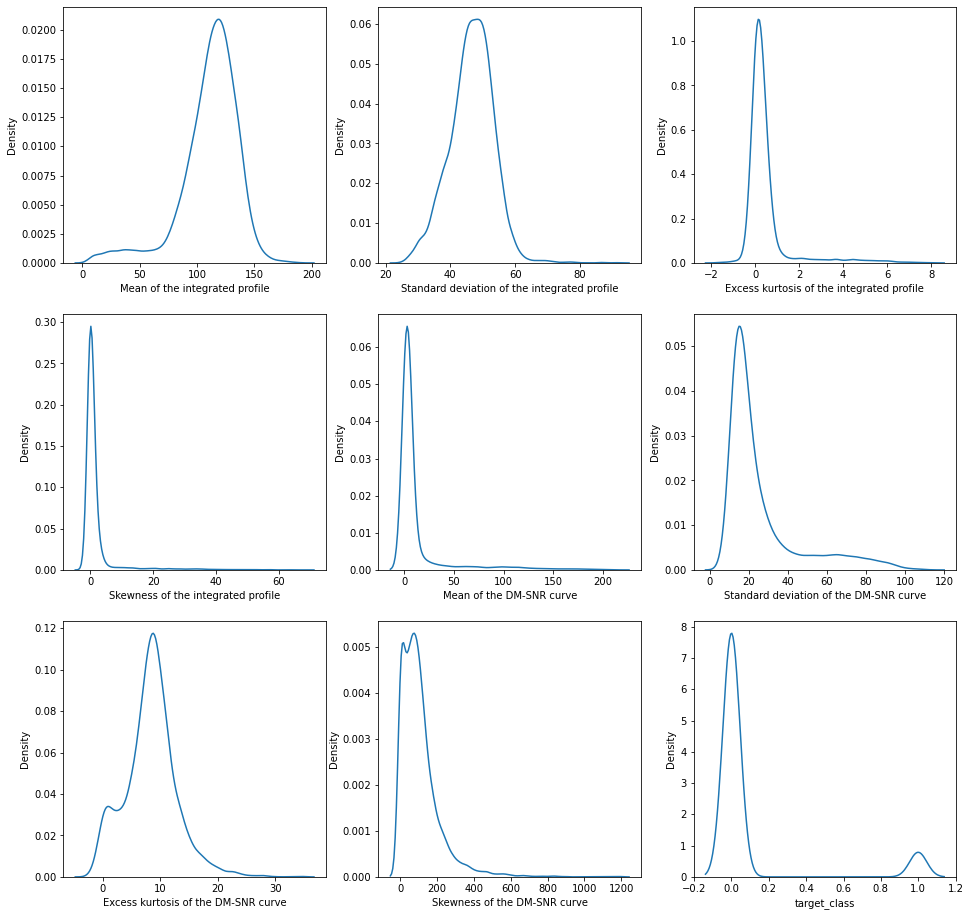

In [10]:
# ahora veremos las distribuciones de cada una de las caracteriticas a ver si estan sesgadas, desbalanceadas
# y ver que distribuciones aparecen. 
df.columns = df.columns.str.strip()
#f, axes = plt.subplots(3,3,figsize=(14,14))
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
sns.kdeplot(df["Mean of the integrated profile"], ax = axes[0,0])
sns.kdeplot(df["Standard deviation of the integrated profile"], ax = axes[0,1])
sns.kdeplot(df["Excess kurtosis of the integrated profile"], ax = axes[0,2])
sns.kdeplot(df["Skewness of the integrated profile"], ax = axes[1,0])
sns.kdeplot(df["Mean of the DM-SNR curve"], ax = axes[1,1])
sns.kdeplot(df["Standard deviation of the DM-SNR curve"], ax = axes[1,2])
sns.kdeplot(df["Excess kurtosis of the DM-SNR curve"], ax = axes[2,0])
sns.kdeplot(df["Skewness of the DM-SNR curve"], ax = axes[2,1])
sns.kdeplot(df["target_class"], ax = axes[2,2])

In [ ]:
# observamows que la mayoria de distribuciones son similares a una gaussiana, sin embargo, hay algunas 
# caracteristicas que presentan alta asimetria. 
# observamos además que existen distribuciones con doble pico.
# vamos hacer un diagrama de correlación para ver cuales son las variables más correlacionadas 



Text(0.5, 1.0, 'Matriz de correlacion')

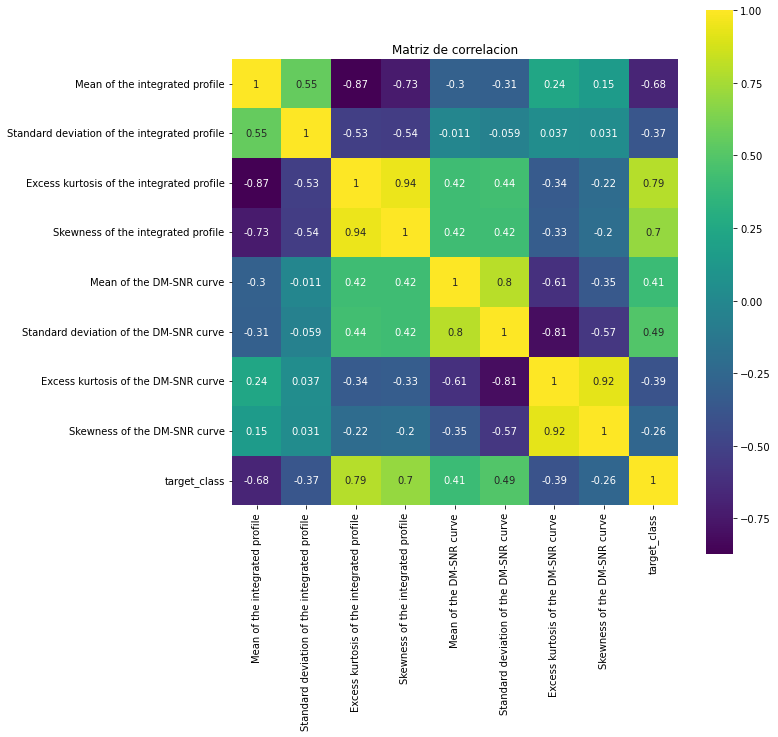

In [35]:
import seaborn as sns
correlations= df.corr()
plt.figure(figsize=[10,10])
ax= sns.heatmap(correlations  ,vmax=1,square=True,annot=True,cmap='viridis')            
plt.title('Matriz de correlacion')

In [ ]:
# De estos datos vemos que las caracteristicas que mas correlación tienen entre si son: 
# Excess kurtosis of the integrated profile vs Mean of the integrated profile
# Mean of the integrated profile vs Excess kurtosis of the integrated profile
# Excess kurtosis of the integrated profile	vs Skewness of the integrated profile
# Mean of the DM-SNR curve	 vs Standard deviation of the DM-SNR curve
# Excess kurtosis of the DM-SNR curve	 vs Standard deviation of the DM-SNR curve
# Mean of the DM-SNR curve	vs Standard deviation of the DM-SNR curve
# Standard deviation of the DM-SNR curve	 vs Excess kurtosis of the DM-SNR curve
# Excess kurtosis of the DM-SNR curve	vs Skewness of the DM-SNR curve

In [ ]:
# Y PARA LA RELACIóN ENTRE LAS CARACTERISTICAS Y LA CLASE:
# Standard deviation of the integrated profile vs target class no tiene una buena correlacion
# Skewness of the integrated profile vs target class no tiene buena correlacion
# Mean of the DM-SNR curve	vs target class no tiene una buena correlacion 
# Standard deviation of the DM-SNR curve	vs targewt class no tiene buena correlacion 
# Excess kurtosis of the DM-SNR curve	vs target class no tiene buena correlacion
# Skewness of the DM-SNR curve vs target class no tienen buena correlacion 

In [ ]:
# Dado que el diagrama de la matriz de correlación no dio información muy relevante referente  a las correlaciones
# entre las caracteristicas y las clases, observando que  son  mas, las  caracteristicas entre si que tienen correlación que las que no. 
# procedemos hacer un diagrama de dispersion de puntos para ver si las caractetisticas poseen un correlaición no lineal 
# entre las mismas y si existen valores anomalos entre los datos.

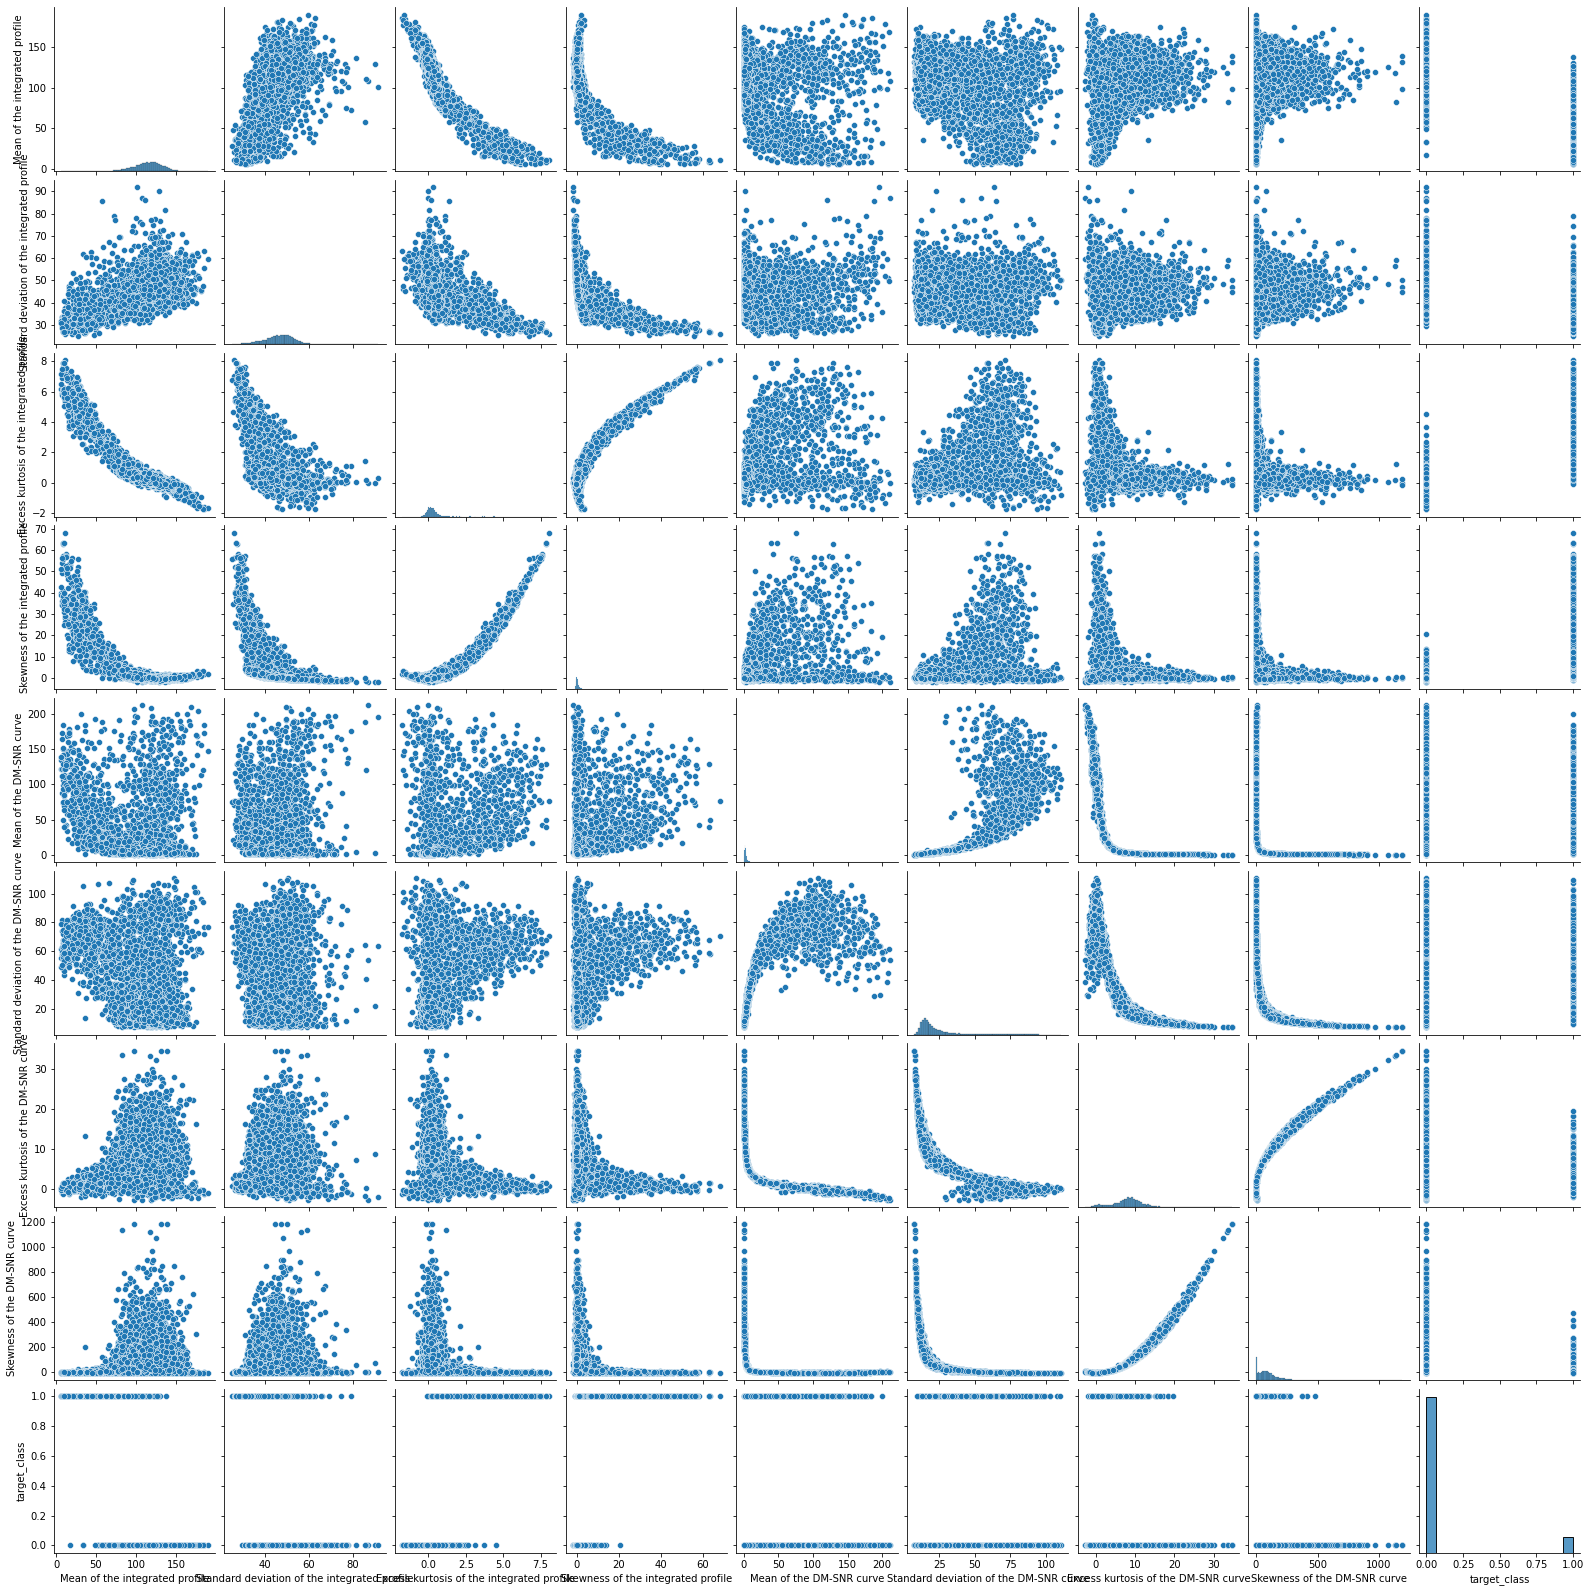

In [37]:
# usanos seaborn para ver mejor los diagrmas de puntos 
sns.pairplot(df)

In [ ]:
# aquí obvervamos que la mayoria de las caracteristicas no presentan un realcion lineal,  lo que afecta la matriz 
# de correlación, asi, que no podemos hacer una selección de mejores caracteristicas, esto se debe tambien
# porque las clases estan desbalaceadas, asi que precederemos a entrenar el modelo con todas las caracteristicas
# y penalizamos la clase dominante en el entrenamiento del mismo.
# Además observamos que en dicho diograma que no existen valores anomalos que pudieran afectar el rescalamiento o la normalización
# ahora efectuaremos un digrama de boxplot para ver cuales son las caracteristicas que poseen sesgo y corregirlo 
# para luego reescalar las variables y normalizarlas para proceder a la face de entrenamiento del modelo.


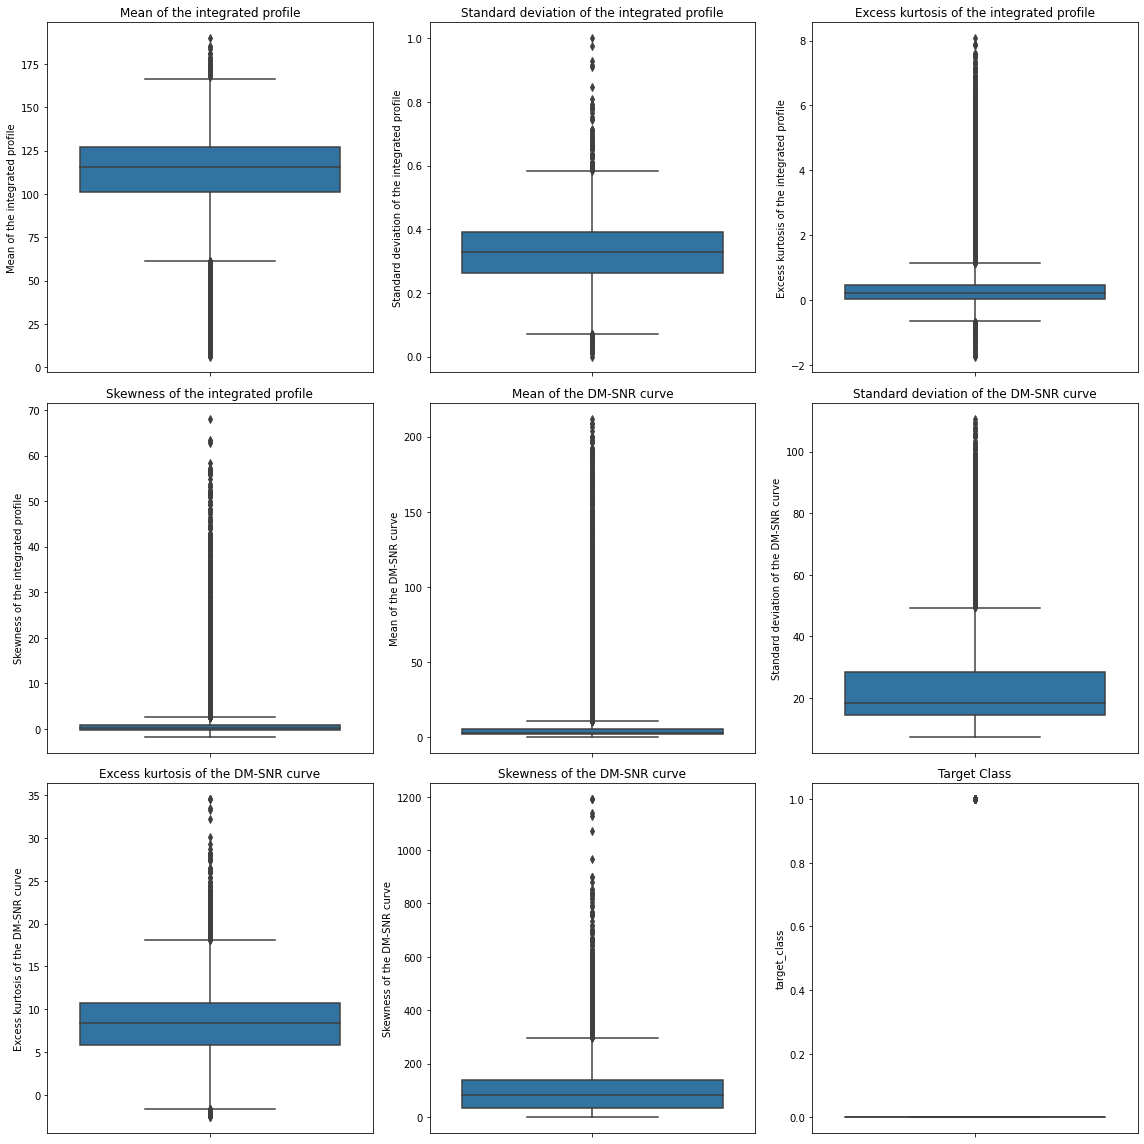

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df es tu DataFrame
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

sns.boxplot(y=df['Mean of the integrated profile'], ax=axes[0, 0]).set(title='Mean of the integrated profile')
sns.boxplot(y=df_normalized['Standard deviation of the integrated profile'], ax=axes[0, 1]).set(title='Standard deviation of the integrated profile')
sns.boxplot(y=df['Excess kurtosis of the integrated profile'], ax=axes[0, 2]).set(title='Excess kurtosis of the integrated profile')
sns.boxplot(y=df['Skewness of the integrated profile'], ax=axes[1, 0]).set(title='Skewness of the integrated profile')
sns.boxplot(y=df['Mean of the DM-SNR curve'], ax=axes[1, 1]).set(title='Mean of the DM-SNR curve')
sns.boxplot(y=df['Standard deviation of the DM-SNR curve'], ax=axes[1, 2]).set(title='Standard deviation of the DM-SNR curve')
sns.boxplot(y=df['Excess kurtosis of the DM-SNR curve'], ax=axes[2, 0]).set(title='Excess kurtosis of the DM-SNR curve')
sns.boxplot(y=df['Skewness of the DM-SNR curve'], ax=axes[2, 1]).set(title='Skewness of the DM-SNR curve')
sns.boxplot(y=df['target_class'], ax=axes[2, 2]).set(title='Target Class')

plt.tight_layout()
plt.show()


In [ ]:
#ahora  normalizamos los datos corregiremos el doble pico presente en la variable "Skewness of the DM-SNR curv"e
# y corregiremos las vartibles que poseen sesgo y las anexamos  corregidas al dataframe. 

<AxesSubplot:xlabel='Skewness of the DM-SNR curve', ylabel='Density'>

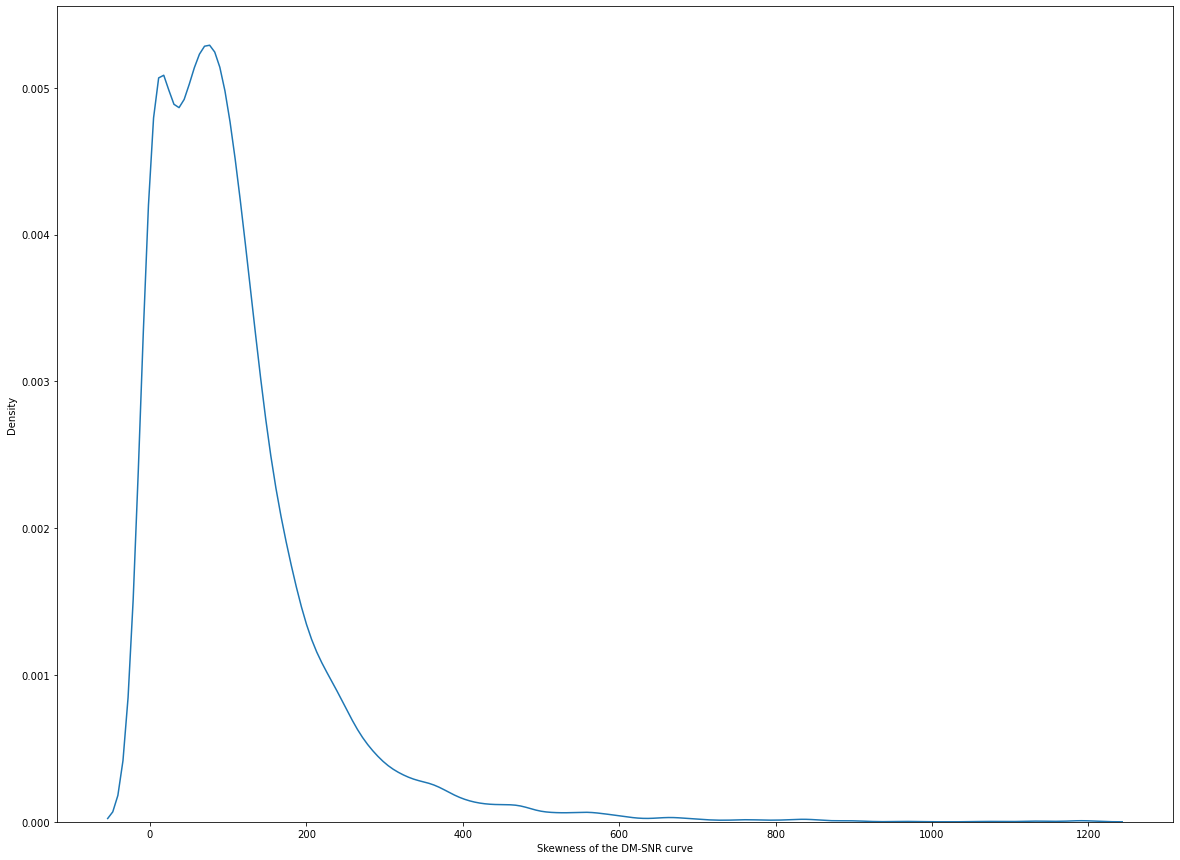

In [39]:
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

data = df["Skewness of the DM-SNR curve"]
# Aplicar KDE para estimar la densidad
kde = gaussian_kde(data, bw_method=0.5)  # Ajusta el suavizado
# Generar nuevos datos suavizados
smoothed_data = kde.resample(len(data))[0]
# Reemplazar la columna original con la versión suavizada
df_features5 = pd.DataFrame(data=smoothed_data , columns=["Skewness of the DM-SNR curve"])
sns.kdeplot(df["Skewness of the DM-SNR curve"])



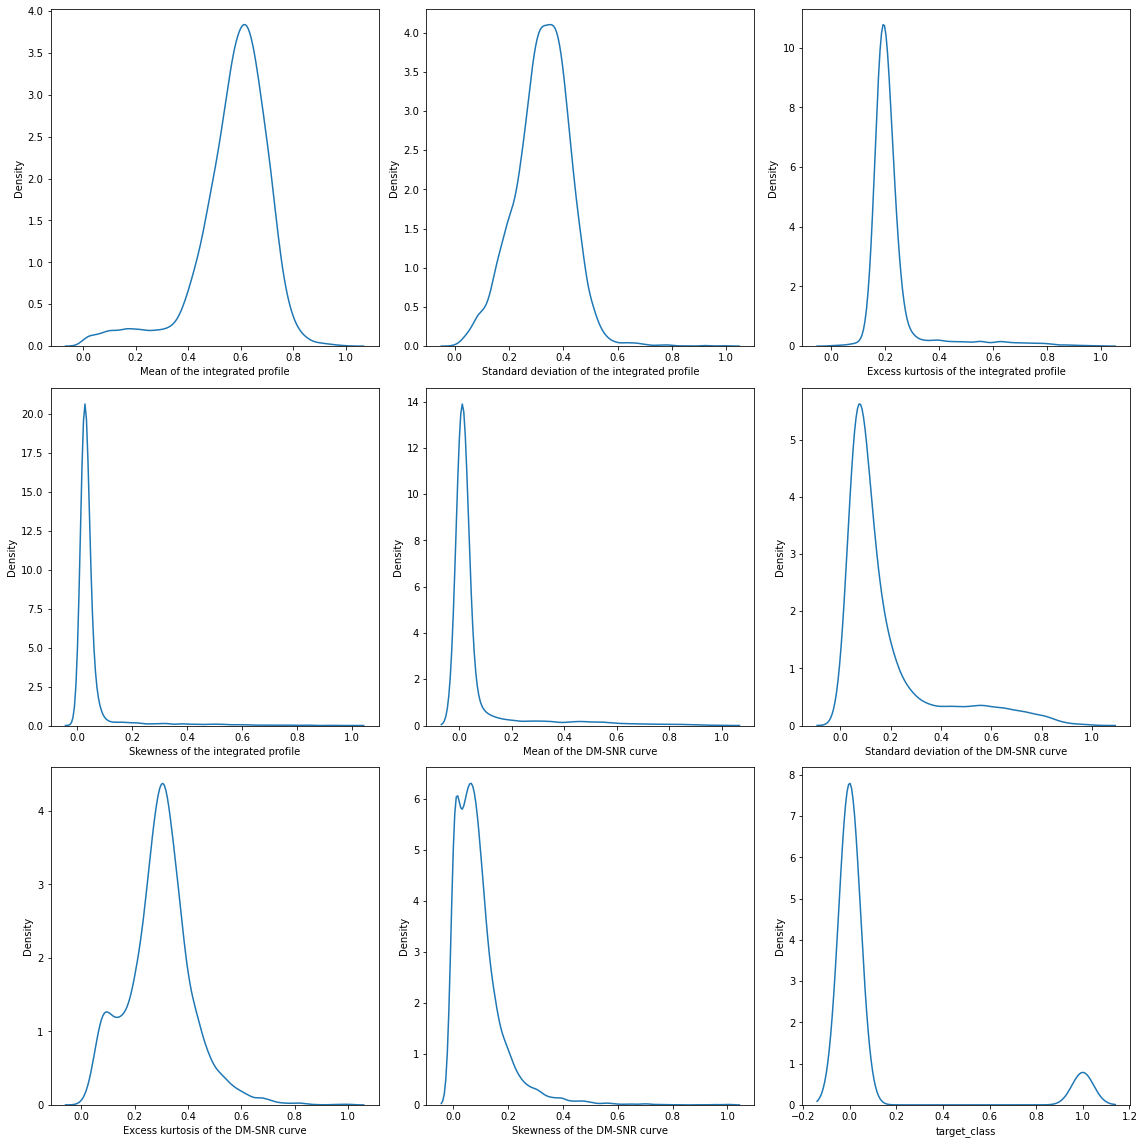

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.626,0.352,0.215,0.025,0.014,0.107,0.271,0.056,0.0
1,0.386,0.170,0.250,0.074,0.010,0.099,0.324,0.088,0.0
2,0.678,0.425,0.191,0.021,0.012,0.145,0.300,0.064,0.0
3,0.428,0.169,0.261,0.072,0.012,0.128,0.297,0.066,0.0
4,0.562,0.465,0.235,0.026,0.012,0.117,0.325,0.083,0.0
...,...,...,...,...,...,...,...,...,...
9268,0.646,0.385,0.201,0.022,0.010,0.064,0.319,0.100,0.0
9269,0.644,0.424,0.176,0.018,0.033,0.212,0.193,0.020,0.0
9270,0.598,0.275,0.245,0.032,0.003,0.041,0.530,0.263,0.0
9271,0.705,0.375,0.168,0.022,0.017,0.137,0.270,0.054,0.0


In [40]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar normalización MinMax
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Graficar después de la normalización
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

sns.kdeplot(df_normalized["Mean of the integrated profile"], ax=axes[0,0])
sns.kdeplot(df_normalized["Standard deviation of the integrated profile"], ax=axes[0,1])
sns.kdeplot(df_normalized["Excess kurtosis of the integrated profile"], ax=axes[0,2])
sns.kdeplot(df_normalized["Skewness of the integrated profile"], ax=axes[1,0])
sns.kdeplot(df_normalized["Mean of the DM-SNR curve"], ax=axes[1,1])
sns.kdeplot(df_normalized["Standard deviation of the DM-SNR curve"], ax=axes[1,2])
sns.kdeplot(df_normalized["Excess kurtosis of the DM-SNR curve"], ax=axes[2,0])
sns.kdeplot(df_normalized["Skewness of the DM-SNR curve"], ax=axes[2,1])
sns.kdeplot(df_normalized["target_class"], ax=axes[2,2])

plt.tight_layout()
plt.show()
df_normalized

<AxesSubplot:title={'center':'Excess kurtosis of the integrated profile'}>

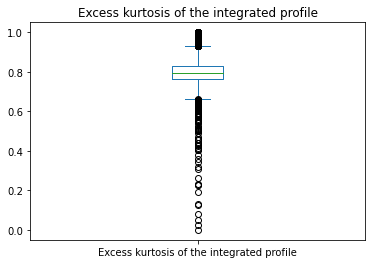

In [21]:
# vamos a realizar una serie de tranformaciones a los datos que presentan mayor sesgo como "Mean of the GM-SNR"  y "Skewness of the DM-SNR"
# Iniciamos el preprocesamiento de los datos 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
features=df_normalized[["Excess kurtosis of the integrated profile"]]
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson1 = pt.fit(features)
transformed_features = pt.transform(features)
df_features2 = pd.DataFrame(data=transformed_features, columns=["Excess kurtosis of the integrated profile"])
scaler = MinMaxScaler()
df_features2['Excess kurtosis of the integrated profile'] = scaler.fit_transform(df_features2[['Excess kurtosis of the integrated profile']])
df_features2['Excess kurtosis of the integrated profile'].plot(kind='box', title='Excess kurtosis of the integrated profile')

<AxesSubplot:title={'center':'Skewness of the DM-SNR curve'}>

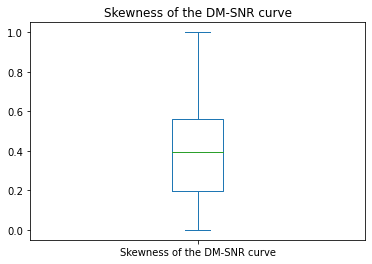

In [22]:
features=df_normalized[["Skewness of the DM-SNR curve"]]
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson1 = pt.fit(features)
transformed_features = pt.transform(features)
df_features3 = pd.DataFrame(data=transformed_features, columns=["Skewness of the DM-SNR curve"])
scaler = MinMaxScaler()
df_features3['Skewness of the DM-SNR curve'] = scaler.fit_transform(df_features3[['Skewness of the DM-SNR curve']])
df_features3['Skewness of the DM-SNR curve'].plot(kind='box', title='Skewness of the DM-SNR curve')

<AxesSubplot:title={'center':'Excess kurtosis of the integrated profile'}>

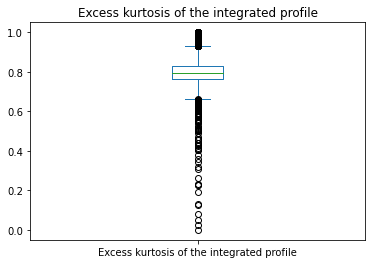

In [23]:
features=df_normalized[["Excess kurtosis of the integrated profile"]]
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_boxcox1 = pt.fit(features)
transformed_features = pt.transform(features)
df_features4 = pd.DataFrame(data=transformed_features, columns=["Excess kurtosis of the integrated profile"])
scaler = MinMaxScaler()
df_features4['Excess kurtosis of the integrated profile'] = scaler.fit_transform(df_features4[['Excess kurtosis of the integrated profile']])
df_features4['Excess kurtosis of the integrated profile'].plot(kind='box', title='Excess kurtosis of the integrated profile')

<AxesSubplot:title={'center':'Standard deviation of the DM-SNR curve'}>

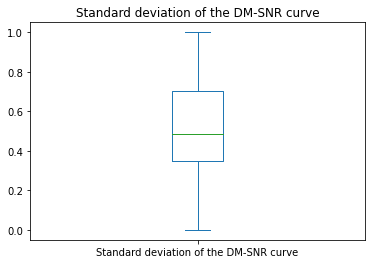

In [24]:
features=df_normalized[["Standard deviation of the DM-SNR curve"]]
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_boxcox1 = pt.fit(features)
transformed_features = pt.transform(features)
df_features6 = pd.DataFrame(data=transformed_features, columns=["Standard deviation of the DM-SNR curve"])
scaler = MinMaxScaler()
df_features6['Standard deviation of the DM-SNR curve'] = scaler.fit_transform(df_features6[['Standard deviation of the DM-SNR curve']])
df_features6['Standard deviation of the DM-SNR curve'].plot(kind='box', title='Standard deviation of the DM-SNR curve')

In [25]:
df_normalized['Excess kurtosis of the integrated profile'] = df_features2['Excess kurtosis of the integrated profile']
df_normalized

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.626,0.352,0.817,0.025,0.014,0.107,0.271,0.056,0.0
1,0.386,0.170,0.856,0.074,0.010,0.099,0.324,0.088,0.0
2,0.678,0.425,0.781,0.021,0.012,0.145,0.300,0.064,0.0
3,0.428,0.169,0.868,0.072,0.012,0.128,0.297,0.066,0.0
4,0.562,0.465,0.840,0.026,0.012,0.117,0.325,0.083,0.0
...,...,...,...,...,...,...,...,...,...
9268,0.646,0.385,0.796,0.022,0.010,0.064,0.319,0.100,0.0
9269,0.644,0.424,0.755,0.018,0.033,0.212,0.193,0.020,0.0
9270,0.598,0.275,0.851,0.032,0.003,0.041,0.530,0.263,0.0
9271,0.705,0.375,0.740,0.022,0.017,0.137,0.270,0.054,0.0


In [26]:
df_normalized['Skewness of the DM-SNR curve'] = df_features3['Skewness of the DM-SNR curve']
df_normalized

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.626,0.352,0.817,0.025,0.014,0.107,0.271,0.328,0.0
1,0.386,0.170,0.856,0.074,0.010,0.099,0.324,0.458,0.0
2,0.678,0.425,0.781,0.021,0.012,0.145,0.300,0.362,0.0
3,0.428,0.169,0.868,0.072,0.012,0.128,0.297,0.370,0.0
4,0.562,0.465,0.840,0.026,0.012,0.117,0.325,0.441,0.0
...,...,...,...,...,...,...,...,...,...
9268,0.646,0.385,0.796,0.022,0.010,0.064,0.319,0.501,0.0
9269,0.644,0.424,0.755,0.018,0.033,0.212,0.193,0.133,0.0
9270,0.598,0.275,0.851,0.032,0.003,0.041,0.530,0.820,0.0
9271,0.705,0.375,0.740,0.022,0.017,0.137,0.270,0.317,0.0


In [27]:
df_normalized['Excess kurtosis of the integrated profile'] = df_features4['Excess kurtosis of the integrated profile']
df_normalized

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.626,0.352,0.817,0.025,0.014,0.107,0.271,0.328,0.0
1,0.386,0.170,0.856,0.074,0.010,0.099,0.324,0.458,0.0
2,0.678,0.425,0.781,0.021,0.012,0.145,0.300,0.362,0.0
3,0.428,0.169,0.868,0.072,0.012,0.128,0.297,0.370,0.0
4,0.562,0.465,0.840,0.026,0.012,0.117,0.325,0.441,0.0
...,...,...,...,...,...,...,...,...,...
9268,0.646,0.385,0.796,0.022,0.010,0.064,0.319,0.501,0.0
9269,0.644,0.424,0.755,0.018,0.033,0.212,0.193,0.133,0.0
9270,0.598,0.275,0.851,0.032,0.003,0.041,0.530,0.820,0.0
9271,0.705,0.375,0.740,0.022,0.017,0.137,0.270,0.317,0.0


In [28]:
df_normalized['Standard deviation of the DM-SNR curve'] = df_features6['Standard deviation of the DM-SNR curve']
df_normalized

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.626,0.352,0.817,0.025,0.014,0.484,0.271,0.328,0.0
1,0.386,0.170,0.856,0.074,0.010,0.458,0.324,0.458,0.0
2,0.678,0.425,0.781,0.021,0.012,0.587,0.300,0.362,0.0
3,0.428,0.169,0.868,0.072,0.012,0.545,0.297,0.370,0.0
4,0.562,0.465,0.840,0.026,0.012,0.515,0.325,0.441,0.0
...,...,...,...,...,...,...,...,...,...
9268,0.646,0.385,0.796,0.022,0.010,0.331,0.319,0.501,0.0
9269,0.644,0.424,0.755,0.018,0.033,0.717,0.193,0.133,0.0
9270,0.598,0.275,0.851,0.032,0.003,0.231,0.530,0.820,0.0
9271,0.705,0.375,0.740,0.022,0.017,0.567,0.270,0.317,0.0


In [29]:
df_normalized


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.626,0.352,0.817,0.025,0.014,0.484,0.271,0.328,0.0
1,0.386,0.170,0.856,0.074,0.010,0.458,0.324,0.458,0.0
2,0.678,0.425,0.781,0.021,0.012,0.587,0.300,0.362,0.0
3,0.428,0.169,0.868,0.072,0.012,0.545,0.297,0.370,0.0
4,0.562,0.465,0.840,0.026,0.012,0.515,0.325,0.441,0.0
...,...,...,...,...,...,...,...,...,...
9268,0.646,0.385,0.796,0.022,0.010,0.331,0.319,0.501,0.0
9269,0.644,0.424,0.755,0.018,0.033,0.717,0.193,0.133,0.0
9270,0.598,0.275,0.851,0.032,0.003,0.231,0.530,0.820,0.0
9271,0.705,0.375,0.740,0.022,0.017,0.567,0.270,0.317,0.0


In [41]:
# ahora con nuestros datos prepocesados,  vamos a usar un modelo de IA para ver el Accuracy de nuestros datos para eso   
# primero debemos separar nuestro conjunto de datos en  prueba y validacion.

import numpy as np
import pandas as pd
names=['Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile',
       'Mean of the DM-SNR curve',
       'Mean of the integrated profile',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve',
       'Skewness of the DM-SNR curve',
       'target_class']
array=df_normalized.values
X=array[:,0:8]
Y=array[:,8]
print(len(Y))
print(len(X))


9273
9273


In [45]:
# iniciamnos usando el modelo de IA  LogisticRegression para evaluar nuestro modelo
# vamos a usar penalizacion para la clase minoritaria por sesgo de clases
#normalmente usamos para los datos un 33% para prueba y un 77% para validación 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

test_size=0.33
seed=7
n_splits = 10 
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state= seed )
model = LogisticRegression(solver='lbfgs', max_iter =1000,class_weight='balanced')
results = cross_val_score(model,X,Y, cv=kfold)
print(f"Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)")




Accuracy: 96.25% (0.26%)


In [44]:
# vemos que el accuracy bajo lo que nos indicaba que el modelo estaba en overfiting 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10,shuffle=True, random_state=7)
model = LogisticRegression(solver='lbfgs', max_iter =1000,class_weight='balanced' )
scoring = 'accuracy'

results = cross_val_score(model,X,Y, cv=kfold,scoring=scoring)
print(f"Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)")
# esta diferencia es debido a la forma en la que dividimos nuestros datos en cuntos de pruebas y entrenamiento, siendo mas efectivos en la 
#forma en que se dividen los datos a Kfold, dado que  ShuffleSplit puede repetir conjutos de datos al momento de hacer la partición

Accuracy: 96.14% (0.59%)


In [ ]:
# vemos que usando dos diferentes formas de particionar nuestro conjunto de datos,obteniendo una precisión
# similar, pero no podemos garantizar que el modelo no este teniendo preferencias por la clase mayoritaria.


In [46]:
# luego usamos el metodo de cohen kappa dado que nuestro target esta desbalanceado a ver si mejora el acurracy de nuestro modelo 
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression


test_size=0.33
seed = 7
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter =1000)
model.fit(X, Y)
predicted = model.predict(X_test)
cohen_score = cohen_kappa_score(Y_test,predicted)
print(f"Cohens_score: {cohen_score*100.0:,.2f}%")


Cohens_score: 84.18%


In [ ]:
# esto indica que los acurracy anterior estaban en overfiting dado que las clases estaban desbalanceadas

In [47]:
# usaremos otra metica mas robusta roc-ouc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10,shuffle=True, random_state=7)
model = LogisticRegression(solver='lbfgs', max_iter =1000)
scoring = 'roc_auc'
results = cross_val_score(model,X,Y, cv=kfold,scoring=scoring)
print(f"AUC: {results.mean()}% ({results.std()})")

AUC: 0.969930424435365% (0.012024213980064539)


In [48]:
# por ulñtimo vamos a emplear la matriz de confuncion 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
test_size=0.33
seed = 7
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter =1000)
model.fit(X, Y)
predicted = model.predict(X_test)
matriz = confusion_matrix(Y_test, predicted)
print(matriz)

[[2752    9]
 [  69  231]]


In [ ]:
# Verdaderos Positivos (2752): Casos correctamente clasificados como positivos.
# Falsos Positivos (9): Casos que fueron incorrectamente clasificados como positivos, cuando en realidad eran negativos.
# Falsos Negativos (69): Casos que eran realmente positivos, pero el modelo los clasificó como negativos.
# Verdaderos Negativos (231): Casos correctamente clasificados como negativos.
#Alta precisión,  si la mayoría de los valores están en la diagonal principal (2752 y 231), lo que indica que el modelo acierta en la clasificación.



In [49]:
# por ultimo vamos a crar un reporte de clasificacion pora los datos 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
test_size=0.33
seed = 7
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter =1000)
model.fit(X, Y)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2761
         1.0       0.96      0.77      0.86       300

    accuracy                           0.97      3061
   macro avg       0.97      0.88      0.92      3061
weighted avg       0.97      0.97      0.97      3061



In [ ]:
 #con esto vemos que el modelo posee valores  por encima del 80% en detectar correctamente los valores en las clases.
 # ademas de tener valores muy altos en macro avg  lo que indica que el modelo predice muy bien los datos sin importar que las clases esten desbalaceadas o no.



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 

In [58]:
models=[]
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000,class_weight='balanced')))
models.append(('SVM',SVC(gamma='auto',class_weight='balanced')))
models.append(('RF', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=7)))  # ← Aquí está el RF
results=[]
names=[]
scoring='accuracy'
for name, model in models: 
    kfold=KFold(n_splits=10,shuffle=True,random_state=7)
    cv_results=cross_val_score(model,X,Y,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR: 96.14% (0.59%)
SVM: 96.90% (0.45%)
RF: 97.83% (0.27%)


In [ ]:
# escogimos esos modelos porque son los que mejores funcionan con datos desbalaceados ahora vamos a compararlo con una red neuronal simple 
 # a ver que resultados podemos obtener. 

In [53]:

from keras.models import Sequential
from keras.layers import 
model = Sequential()
model.add(Dense(12,input_dim = 8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))  

## Compilar the keras model 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# fit he model
model.fit(X,Y,epochs=150,batch_size=16)

_, accuracy=model.evaluate(X,Y)
print('Accuracy:%.2f'%(accuracy*100))

C:\Users\USUARIO\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9119 - loss: 0.3625
Epoch 2/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0892
Epoch 3/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0820
Epoch 4/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0804
Epoch 5/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0810
Epoch 6/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0793
Epoch 7/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0876
Epoch 8/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0756
Epoch 9/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0837
Epoch 10/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0911
Epoch 11/150
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0755
Epoch 12/150
580/580 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# vemos que al emplear un red neuronal de capa simple la precisión  mejora en un orden de 1% con respecto a los
# metodos convencionales de machine learning, resultado ser el mejor de los 4 modelos puestos a prueba al momento de entrenar. 